In [25]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [26]:
# h5_file = "20250122-081736_pluto_3state.h5"
h5_file = "20250122-084756_pluto_3state.h5"

Reading 20250122-084756_pluto_3state.h5
1737506888.0535216


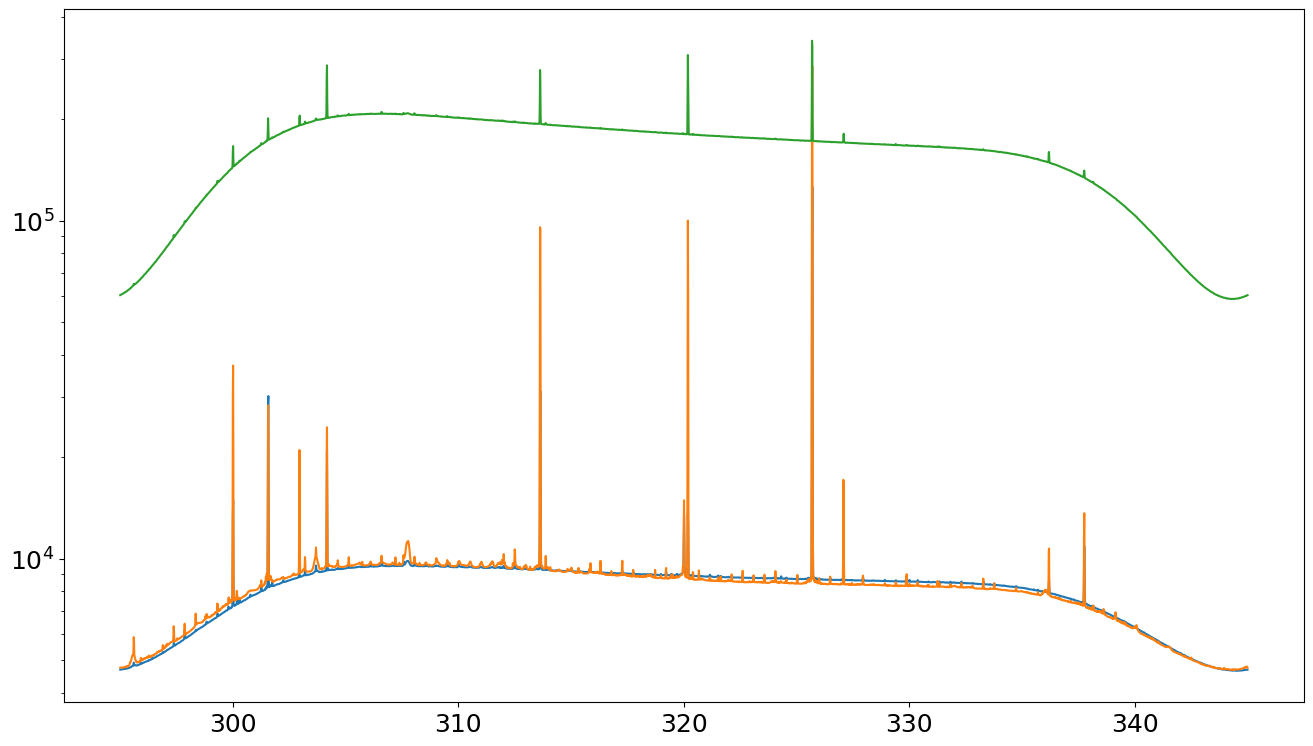

In [27]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

NFFT = hf["data"].attrs['NFFT']
fc = hf["data"].attrs['fc']
fs = hf["data"].attrs['fs']
gain = hf["data"].attrs['gain']

freq = np.linspace(fc-(fs/2), fc+(fs/2), NFFT)/1e6

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)-1

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]
temperature = hf["data/temperature"][()][ant_index] + 273.15 #Convert to kelvins

ant_tstamps = hf["data/timestamps"][()][ant_index]
print (ant_tstamps[0])
ant_tstamps = ant_tstamps - ant_tstamps[0]

hf.close()

plt.figure(figsize=(16,9))
plt.semilogy(freq, np.mean(ant_data, axis=0))
plt.semilogy(freq, np.mean(cold_data, axis=0))
plt.semilogy(freq, np.mean(hot_data, axis=0))

(2600.0, 2800.0)

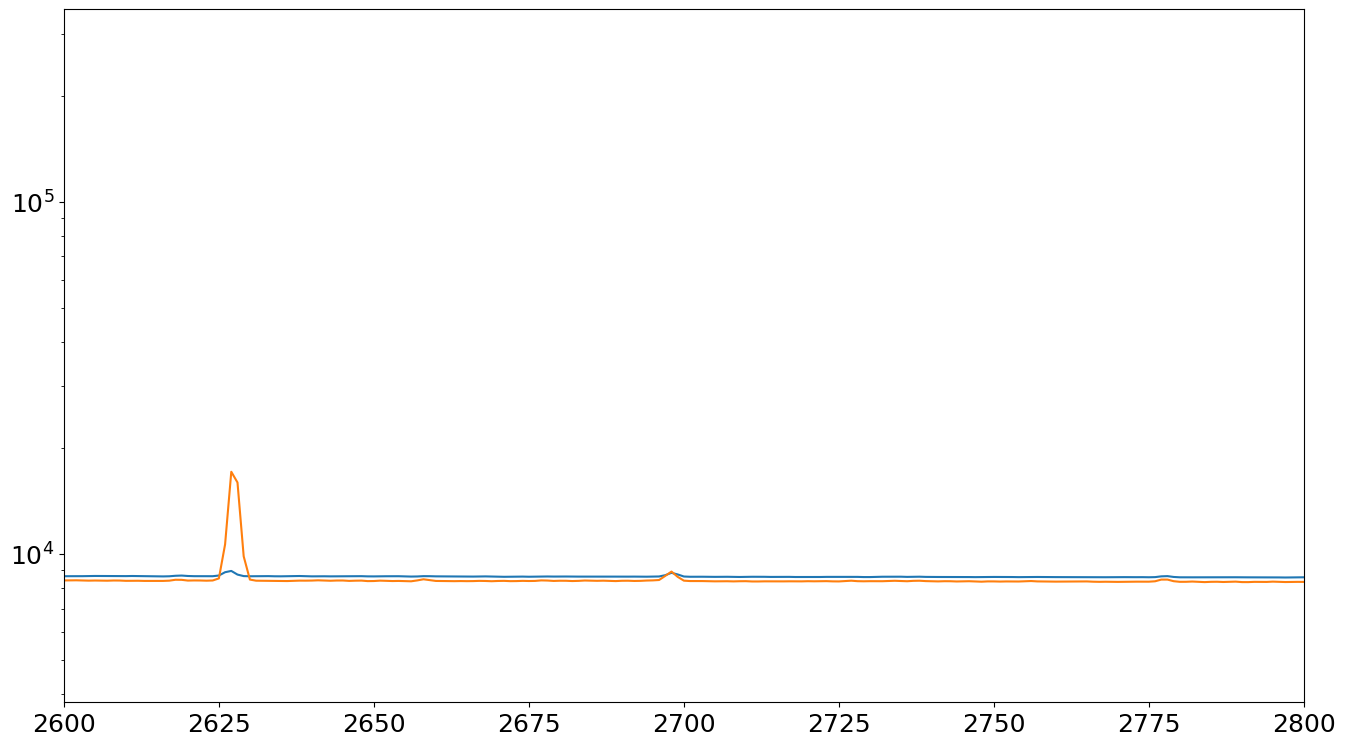

In [28]:
plt.figure(figsize=(16,9))
plt.semilogy(np.mean(ant_data, axis=0))
plt.semilogy(np.mean(cold_data, axis=0))
# plt.semilogy(np.mean(hot_data, axis=0))
plt.xlim(2600,2800)

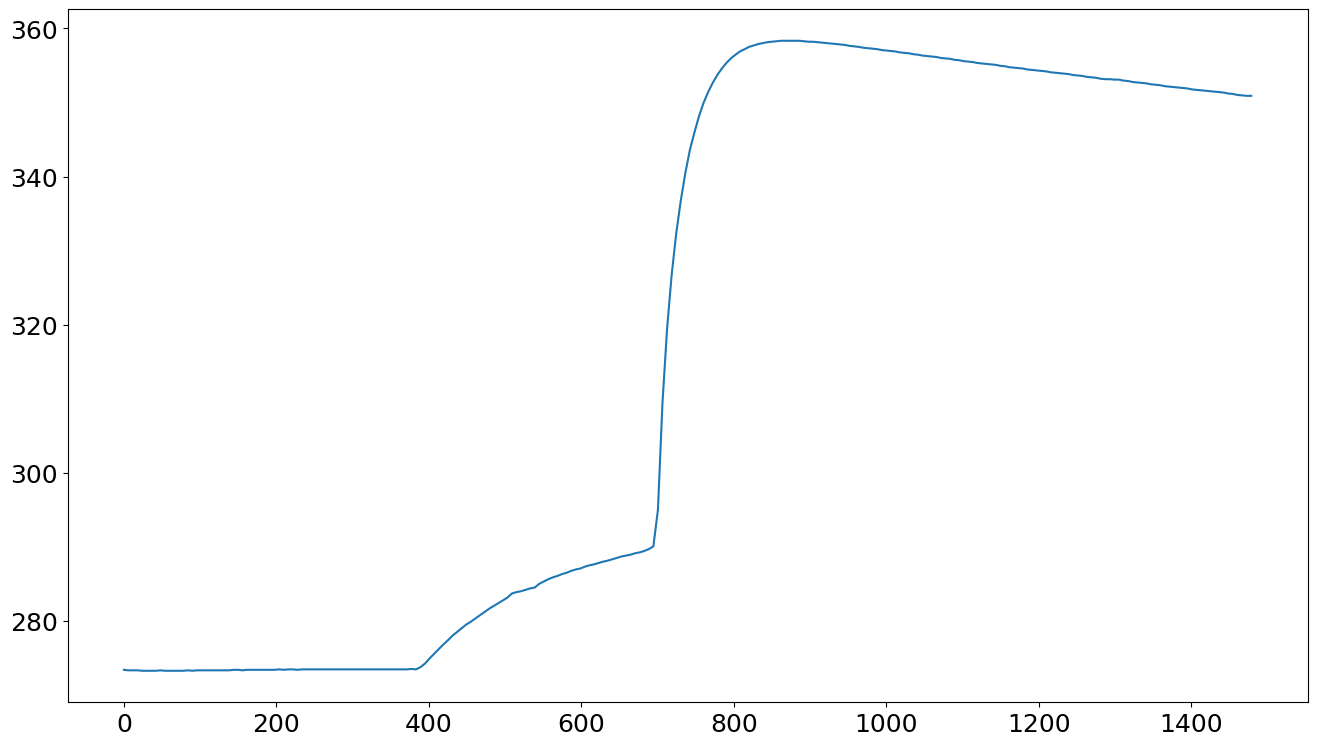

In [29]:
plt.figure(figsize=(16,9))
plt.plot(ant_tstamps, temperature)


In [30]:
ant_calibrated = ant_data/(hot_data - cold_data)
cold_calibrated = cold_data/(hot_data - cold_data)
hot_calibrated = hot_data/(hot_data - cold_data)

mean_ant_power = np.mean(ant_calibrated, axis=1)
mean_cold_power = np.mean(cold_calibrated, axis=1)
mean_hot_power = np.mean(hot_calibrated, axis=1)

mean_ant_spectrum = np.mean(ant_calibrated, axis=0)
mean_cold_spectrum = np.mean(cold_calibrated, axis=0)
mean_hot_spectrum = np.mean(hot_calibrated, axis=0)

(0.0, 10000.0)

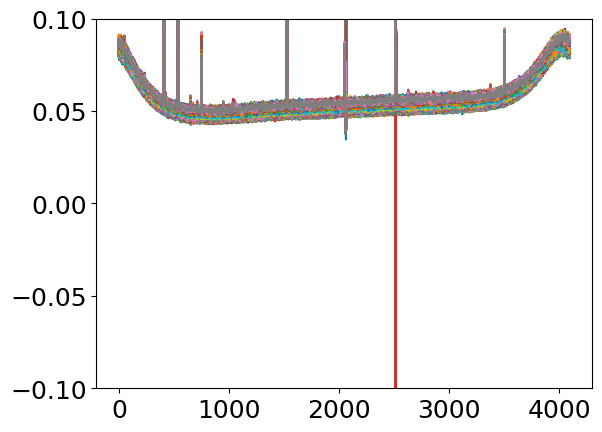

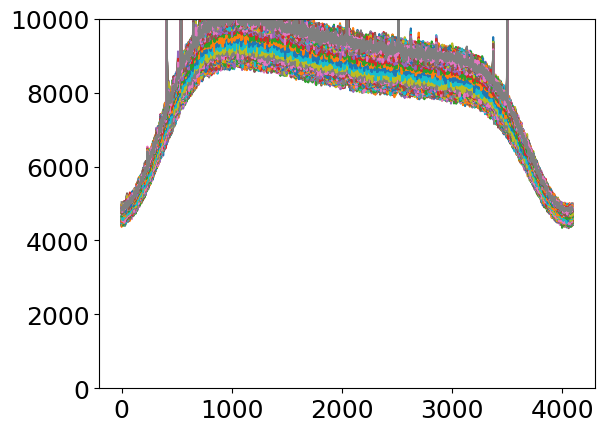

In [31]:
plt.figure()
plt.plot(ant_calibrated.T)
plt.ylim(-0.1, 0.1)

plt.figure()
plt.plot(ant_data.T)
plt.ylim(0, 10000)

# plt.plot(mean_cold_power)
# plt.plot(mean_hot_power)

In [32]:
ant_calibrated.shape
ant_cal_power_norfi = np.mean(ant_calibrated[:,2700:2800], axis=1)

[7.68288961e-05 2.93519568e-02]
382.0431934190297
13313.80142401719


(0.05, 0.0575)

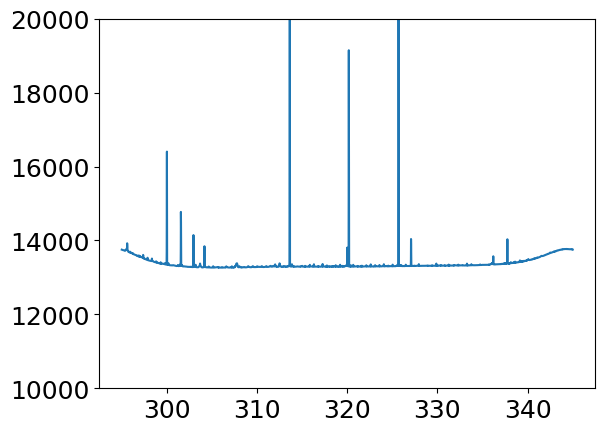

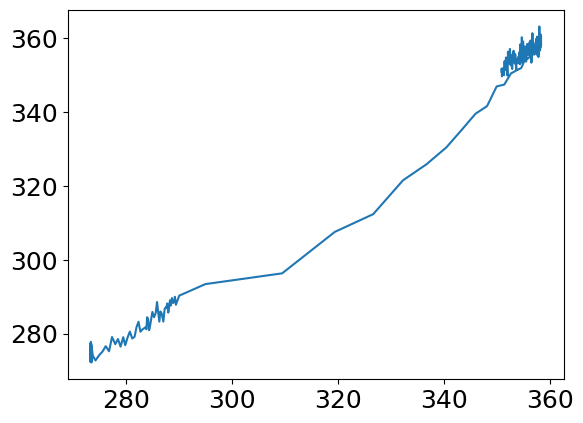

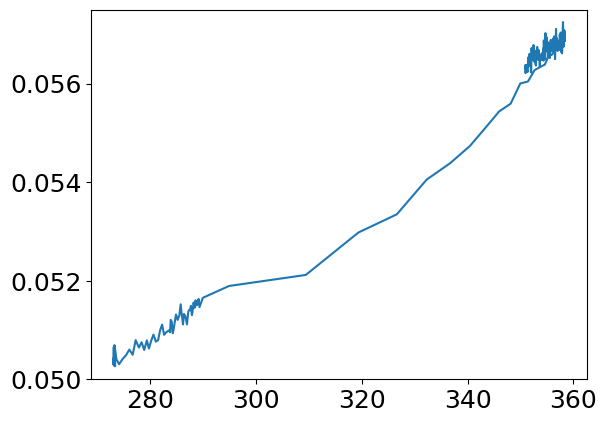

In [42]:
pfit_c = np.polyfit(temperature, ant_cal_power_norfi, 1)
print (pfit_c)

ant_cal_power_norfi_tcal = ant_cal_power_norfi/pfit_c[0]
T_RX = pfit_c[1]/pfit_c[0]
print (T_RX)

mean_hot_spectrum_tcal = (mean_hot_spectrum/pfit_c[0]) - T_RX

print (np.mean(mean_hot_spectrum_tcal[2700:2800]))

plt.figure()
plt.plot(freq, mean_hot_spectrum_tcal)
plt.ylim(1e4, 2e4)

plt.figure()
plt.plot(temperature, (ant_cal_power_norfi_tcal-T_RX))

plt.figure()
plt.plot(temperature, ant_cal_power_norfi)
plt.ylim(0.05, 0.0575)